In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

In [5]:
# The following describes the dataset variables:

# ·      CRIM - per capita crime rate by town

# ·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

# ·      INDUS - proportion of non-retail business acres per town.

# ·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

# ·      NOX - nitric oxides concentration (parts per 10 million)

# ·      RM - average number of rooms per dwelling

# ·      AGE - proportion of owner-occupied units built prior to 1940

# ·      DIS - weighted distances to five Boston employment centres

# ·      RAD - index of accessibility to radial highways

# ·      TAX - full-value property-tax rate per $10,000

# ·      PTRATIO - pupil-teacher ratio by town

# ·      LSTAT - % lower status of the population

# ·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


[Text(0, 0.5, 'Median value of owner-occupied homes.'),
 Text(0.5, 0, ' '),
 Text(0.5, 1.0, 'Median value of owner-occupied homes')]

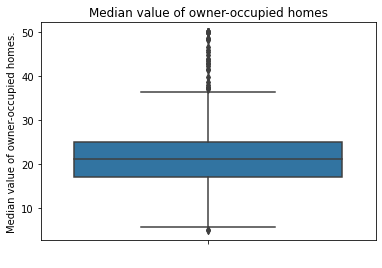

In [18]:
graph = sns.boxplot(y = 'MEDV', data = boston_df)
graph.set(ylabel = "Median value of owner-occupied homes.", xlabel = " ", title = "Median value of owner-occupied homes")

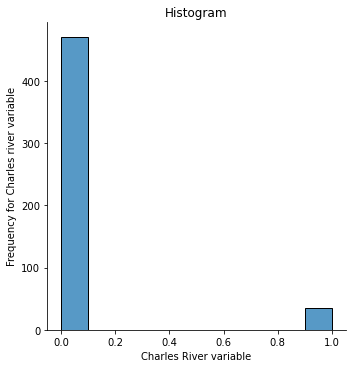

In [20]:
charlesriver = sns.displot(boston_df['CHAS'])
charlesriver.set(xlabel = "Charles River variable",ylabel = "Frequency for Charles river variable", title = "Histogram")
#using seaborn

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

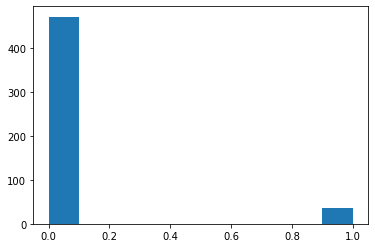

In [12]:
plt.hist(boston_df['CHAS']) #using matplotlib

In [13]:
new_df = boston_df[['AGE','MEDV']].copy()
print(new_df)

      AGE  MEDV
0    65.2  24.0
1    78.9  21.6
2    61.1  34.7
3    45.8  33.4
4    54.2  36.2
..    ...   ...
501  69.1  22.4
502  76.7  20.6
503  91.0  23.9
504  89.3  22.0
505  80.8  11.9

[506 rows x 2 columns]


{'whiskers': [<matplotlib.lines.Line2D at 0x1a8bf7483a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8bf748a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8bf748040>,
 'medians': [<matplotlib.lines.Line2D at 0x1a8bf754160>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a8bf7544f0>,
 'means': []}

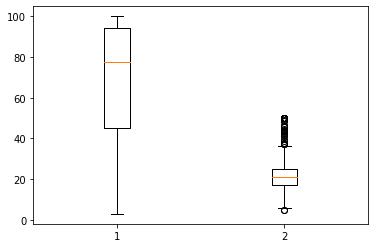

In [14]:
plt.boxplot(new_df) #using matplotlib

[Text(0.5, 0, 'Proportion of owner-occupied houses built prior to 1940'),
 Text(0, 0.5, 'Median value of owner-occupied homes -- displayed in thousands of dollars'),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable.')]

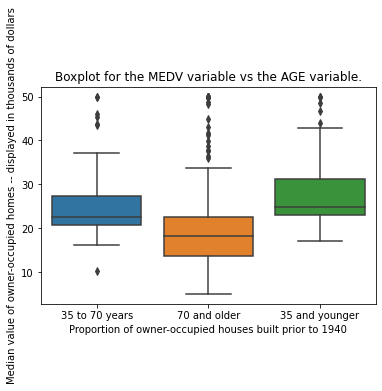

In [21]:
boston_df.loc[boston_df['AGE'] <= 35, 'Age'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age'] = "35 to 70 years"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age'] = "70 and older"

boxplot = sns.boxplot(x = 'Age', y = 'MEDV', data = boston_df)
boxplot.set(xlabel = "Proportion of owner-occupied houses built prior to 1940", ylabel = "Median value of owner-occupied homes -- displayed in thousands of dollars" , title = "Boxplot for the MEDV variable vs the AGE variable.")
#same graph as above, using seaborn

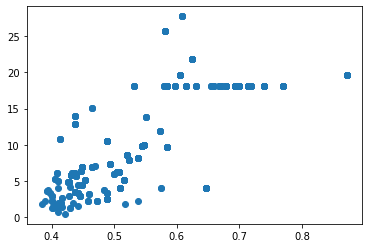

In [16]:
plt.scatter(boston_df['NOX'],boston_df['INDUS']) #using matplotlib

[Text(0, 0.5, 'Nitric Oxide concentration'),
 Text(0.5, 0, 'Non-retail business acres per town.'),
 Text(0.5, 1.0, 'Scatter Plot between NOX and INDUS')]

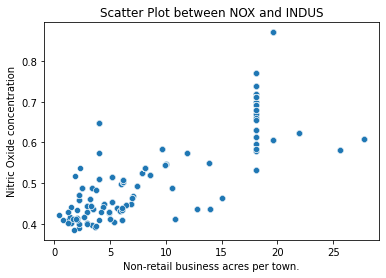

In [22]:
#same as above, using seaborn:

scatterplot = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatterplot.set(ylabel = "Nitric Oxide concentration", xlabel = "Non-retail business acres per town."
           , title = "Scatter Plot between NOX and INDUS")

Task 4, 4th subitem - Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

The scatterplot shows a positive correlation (trend upwards) between nitric oxides concentration and the proportion of non-retail business acres per town.

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

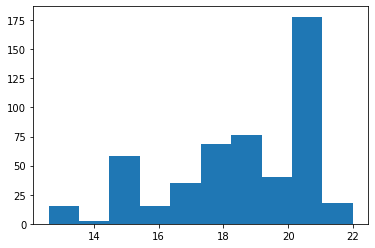

In [17]:
plt.hist(boston_df['PTRATIO'])

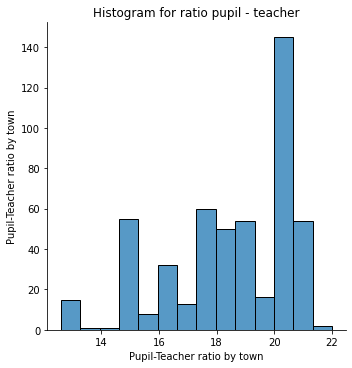

In [23]:
#same as above, using seaborn
ptratio = sns.displot(boston_df['PTRATIO'])
ptratio.set(xlabel = "Pupil-Teacher ratio by town", ylabel = "Pupil-Teacher ratio by town", title = "Histogram for ratio pupil - teacher")

Task 5, item 1 - Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: There's no difference in the median value of houses bounded by the Charles river;
H1: There is a difference in the median value of houses bounded by the Charles river.

In [24]:
#1 - Levene's test to check significance

scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

In [25]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

Taking into consideration the values above, as the p-value is less than alpha value 0.05, we can reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

Task 5, item 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [26]:
# set age groups, as already done on Task 4

boston_df.loc[boston_df['AGE'] <= 35, 'Age'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age'] = "35 to 70 years"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age'] = "70 and older"

In [ ]:
#Hipotesis
#H0: There's no difference between these 3 groups means
#H1: at least one of the means differs with statistical significance

In [27]:
#Levene's test to check significance

scipy.stats.levene(boston_df[boston_df['Age'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age'] == "35 to 70 years"]['MEDV'], 
                   boston_df[boston_df['Age'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [28]:
group1 = boston_df[boston_df['Age'] == "35 and younger"]['MEDV']
group2 = boston_df[boston_df['Age'] == "35 to 70 years"]['MEDV']
group3 = boston_df[boston_df['Age'] == "70 and older"]['MEDV']
scipy.stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

As the p-value is less than alpha value 0.05, we can reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses for each proportion of owner occupied units built prior to 1940.

Task 5, subitem 3 - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [ ]:
#Hypothesis
#H0: There's no relationship between NOx levels and proportion of non-retail business in town
#H1: There is a relationship between NOx levels and proportion of non-retail business in town

In [29]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

In [ ]:
#The p-value is inferior to alpha, so we can reject the null hypothesis, therefore there is 
#correlation between NOx levels and non-retails businesses in town. The graph suggest there's a positive correlation.

Task 5, subitem 4 - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [ ]:
#Hypothesis:
#H0 is that Beta1 = 0 - or that there is no impact on additional distance between owner-occupied homes and employment centre
#H1 is that Beta1 is not equal to zero (B1 != 0), or that there is impact on additional distance between homes and employment centre.


In [31]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [32]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 27 Aug 2021   Prob (F-statistic):           1.21e-08
Time:                        22:24:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P-value < alpha (α = 0.05) so the null hypothesis can be rejected as there is evidence of impact of additional distance to Boston employment centre on the median value of owner occupied homes.